In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes_dataset__2019.csv')

In [2]:
df

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood  \
0        no      no      8           6              no  occasionally   
1        no      no      8           6             yes    very often   
2        no      no      6           6              no  occasionally   
3        no      no      8           6              no  occasionally   
4        no      no      8           8              no  occasionally   
..      ...     ...    ...         ...             ...           ...   
947      no      no      8           6              no         often   
948      no      no      6           5             yes  occasionally   
949      no      no      6           5             yes  occasionally   
950      no     yes      6           5             yes  occasionally   
951      no      no      7           4             yes  occasionally   

         Stress BPLevel  Pregancies Pdiabetes UriationFreq Diabetic  
0     sometimes    high         0.0         0     not much       no  
1     sometimes  normal         0.0         0     not much       no  
2     sometimes  normal         0.0         0     not much       no  
3     sometimes  normal         0.0         0     not much       no  
4     sometimes  normal         0.0         0     not much       no  
..          ...     ...         ...       ...          ...      ...  
947   sometimes  normal         0.0         0     not much      yes  
948   sometimes    high         0.0         0  quite often      yes  
949   sometimes    high         0.0         0     not much       no  
950  very often    high         0.0         0     not much       no  
951   sometimes    high         2.0         0  quite often      yes  

[952 rows x 18 columns]

In [3]:
df.loc[pd.isnull(df.BMI), 'BMI'] = df.BMI.mean()
df.loc[pd.isnull(df.Pregancies), 'Pregancies'] = 0
df.loc[pd.isnull(df.Pdiabetes), 'Pdiabetes'] = 0
df.loc[pd.isnull(df.Diabetic), 'Diabetic'] = 'no'
df.loc[:,'Diabetic'] = df.Diabetic.replace(' no','no')
df.loc[:,'Pdiabetes'] = df.Diabetic.replace(' no','no')
df.loc[:,'Diabetic'] = df.Diabetic.replace(0,'no')
df.loc[:,'RegularMedicine'] = df.RegularMedicine.replace('o','no')
df.loc[:,'BPLevel'] = df.BPLevel.replace('normal ','normal').replace('High ','high').replace('Low ','low')

In [4]:
df

Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smoking Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood  \
0        no      no      8           6              no  occasionally   
1        no      no      8           6             yes    very often   
2        no      no      6           6              no  occasionally   
3        no      no      8           6              no  occasionally   
4        no      no      8           8              no  occasionally   
..      ...     ...    ...         ...             ...           ...   
947      no      no      8           6              no         often   
948      no      no      6           5             yes  occasionally   
949      no      no      6           5             yes  occasionally   
950      no     yes      6           5             yes  occasionally   
951      no      no      7           4             yes  occasionally   

         Stress BPLevel  Pregancies Pdiabetes UriationFreq Diabetic  
0     sometimes    high         0.0        no     not much       no  
1     sometimes  normal         0.0        no     not much       no  
2     sometimes  normal         0.0        no     not much       no  
3     sometimes  normal         0.0        no     not much       no  
4     sometimes  normal         0.0        no     not much       no  
..          ...     ...         ...       ...          ...      ...  
947   sometimes  normal         0.0       yes     not much      yes  
948   sometimes    high         0.0       yes  quite often      yes  
949   sometimes    high         0.0        no     not much       no  
950  very often    high         0.0        no     not much       no  
951   sometimes    high         2.0       yes  quite often      yes  

[952 rows x 18 columns]

In [7]:
df_d = pd.get_dummies(df)

In [8]:
df_d

BMI  Sleep  SoundSleep  Pregancies  Age_40-49  Age_50-59  \
0    39.0      8           6         0.0          0          1   
1    28.0      8           6         0.0          0          1   
2    24.0      6           6         0.0          1          0   
3    23.0      8           6         0.0          0          1   
4    27.0      8           8         0.0          1          0   
..    ...    ...         ...         ...        ...        ...   
947  25.0      8           6         0.0          0          0   
948  27.0      6           5         0.0          0          0   
949  23.0      6           5         0.0          0          0   
950  27.0      6           5         0.0          0          0   
951  30.0      7           4         2.0          0          0   

     Age_60 or older  Age_less than 40  Gender_Female  Gender_Male  ...  \
0                  0                 0              0            1  ...   
1                  0                 0              0            1  ...   
2                  0                 0              0            1  ...   
3                  0                 0              0            1  ...   
4                  0                 0              0            1  ...   
..               ...               ...            ...          ...  ...   
947                0                 1              0            1  ...   
948                1                 0              0            1  ...   
949                1                 0              0            1  ...   
950                1                 0              0            1  ...   
951                1                 0              1            0  ...   

     BPLevel_Low  BPLevel_high  BPLevel_low  BPLevel_normal  Pdiabetes_no  \
0              0             1            0               0             1   
1              0             0            0               1             1   
2              0             0            0               1             1   
3              0             0            0               1             1   
4              0             0            0               1             1   
..           ...           ...          ...             ...           ...   
947            0             0            0               1             0   
948            0             1            0               0             0   
949            0             1            0               0             1   
950            0             1            0               0             1   
951            0             1            0               0             0   

     Pdiabetes_yes  UriationFreq_not much  UriationFreq_quite often  \
0                0                      1                         0   
1                0                      1                         0   
2                0                      1                         0   
3                0                      1                         0   
4                0                      1                         0   
..             ...                    ...                       ...   
947              1                      1                         0   
948              1                      0                         1   
949              0                      1                         0   
950              0                      1                         0   
951              1                      0                         1   

     Diabetic_no  Diabetic_yes  
0              1             0  
1              1             0  
2              1             0  
3              1             0  
4              1             0  
..           ...           ...  
947            0             1  
948            0             1  
949            1             0  
950            1             0  
951            0             1  

[952 rows x 43 columns]

In [9]:
X = df_d.div( df_d.sum(axis=1),axis='rows')

In [10]:
X

BMI     Sleep  SoundSleep  Pregancies  Age_40-49  Age_50-59  \
0    0.582090  0.119403    0.089552    0.000000   0.000000   0.014925   
1    0.500000  0.142857    0.107143    0.000000   0.000000   0.017857   
2    0.480000  0.120000    0.120000    0.000000   0.020000   0.000000   
3    0.450980  0.156863    0.117647    0.000000   0.000000   0.019608   
4    0.473684  0.140351    0.140351    0.000000   0.017544   0.000000   
..        ...       ...         ...         ...        ...        ...   
947  0.471698  0.150943    0.113208    0.000000   0.000000   0.000000   
948  0.519231  0.115385    0.096154    0.000000   0.000000   0.000000   
949  0.479167  0.125000    0.104167    0.000000   0.000000   0.000000   
950  0.519231  0.115385    0.096154    0.000000   0.000000   0.000000   
951  0.526316  0.122807    0.070175    0.035088   0.000000   0.000000   

     Age_60 or older  Age_less than 40  Gender_Female  Gender_Male  ...  \
0           0.000000          0.000000       0.000000     0.014925  ...   
1           0.000000          0.000000       0.000000     0.017857  ...   
2           0.000000          0.000000       0.000000     0.020000  ...   
3           0.000000          0.000000       0.000000     0.019608  ...   
4           0.000000          0.000000       0.000000     0.017544  ...   
..               ...               ...            ...          ...  ...   
947         0.000000          0.018868       0.000000     0.018868  ...   
948         0.019231          0.000000       0.000000     0.019231  ...   
949         0.020833          0.000000       0.000000     0.020833  ...   
950         0.019231          0.000000       0.000000     0.019231  ...   
951         0.017544          0.000000       0.017544     0.000000  ...   

     BPLevel_Low  BPLevel_high  BPLevel_low  BPLevel_normal  Pdiabetes_no  \
0            0.0      0.014925          0.0        0.000000      0.014925   
1            0.0      0.000000          0.0        0.017857      0.017857   
2            0.0      0.000000          0.0        0.020000      0.020000   
3            0.0      0.000000          0.0        0.019608      0.019608   
4            0.0      0.000000          0.0        0.017544      0.017544   
..           ...           ...          ...             ...           ...   
947          0.0      0.000000          0.0        0.018868      0.000000   
948          0.0      0.019231          0.0        0.000000      0.000000   
949          0.0      0.020833          0.0        0.000000      0.020833   
950          0.0      0.019231          0.0        0.000000      0.019231   
951          0.0      0.017544          0.0        0.000000      0.000000   

     Pdiabetes_yes  UriationFreq_not much  UriationFreq_quite often  \
0         0.000000               0.014925                  0.000000   
1         0.000000               0.017857                  0.000000   
2         0.000000               0.020000                  0.000000   
3         0.000000               0.019608                  0.000000   
4         0.000000               0.017544                  0.000000   
..             ...                    ...                       ...   
947       0.018868               0.018868                  0.000000   
948       0.019231               0.000000                  0.019231   
949       0.000000               0.020833                  0.000000   
950       0.000000               0.019231                  0.000000   
951       0.017544               0.000000                  0.017544   

     Diabetic_no  Diabetic_yes  
0       0.014925      0.000000  
1       0.017857      0.000000  
2       0.020000      0.000000  
3       0.019608      0.000000  
4       0.017544      0.000000  
..           ...           ...  
947     0.000000      0.018868  
948     0.000000      0.019231  
949     0.020833      0.000000  
950     0.019231      0.000000  
951     0.000000      0.017544  

[952 rows x 43 columns]

In [12]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=8)
km.fit_predict(X)

array([7, 2, 2, 6, 6, 1, 6, 1, 6, 1, 1, 6, 6, 1, 1, 4, 6, 2, 1, 6, 2, 4,
       4, 1, 6, 6, 6, 2, 2, 1, 2, 1, 4, 2, 6, 1, 3, 3, 3, 3, 2, 2, 0, 6,
       6, 6, 0, 0, 0, 4, 6, 5, 6, 2, 7, 4, 1, 7, 6, 1, 1, 7, 1, 1, 7, 3,
       3, 4, 4, 4, 3, 1, 6, 4, 4, 6, 3, 3, 7, 4, 6, 3, 6, 7, 2, 2, 5, 3,
       5, 5, 5, 2, 6, 6, 7, 2, 6, 5, 1, 2, 2, 2, 6, 1, 1, 3, 3, 4, 4, 6,
       4, 7, 4, 2, 2, 5, 7, 5, 6, 5, 3, 4, 2, 7, 0, 7, 6, 2, 1, 5, 4, 2,
       3, 4, 6, 6, 1, 2, 1, 1, 6, 6, 7, 7, 7, 7, 0, 7, 2, 2, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 2, 7, 0, 0, 0, 7, 7, 7, 0, 0, 7, 0, 0, 0, 7, 0,
       7, 7, 1, 3, 1, 3, 3, 1, 1, 1, 2, 1, 2, 6, 6, 2, 6, 1, 2, 2, 2, 1,
       1, 7, 5, 5, 2, 7, 2, 6, 5, 5, 7, 5, 2, 7, 6, 2, 2, 7, 1, 6, 1, 2,
       2, 5, 4, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 6, 4, 3, 4, 4, 7, 4, 2, 6,
       3, 1, 6, 1, 3, 1, 1, 6, 6, 1, 1, 4, 3, 2, 1, 6, 2, 4, 4, 1, 6, 6,
       6, 2, 2, 1, 2, 1, 4, 4, 3, 1, 3, 3, 3, 3, 2, 3, 0, 6, 6, 6, 0, 0,
       0, 4, 6, 5, 3, 2, 7, 4, 1, 7, 3, 1, 1, 7, 1,

In [17]:
distortions = []
n_cluster = range(2,15)
for n in n_cluster:
    print(n)
    distortions.append( KMeans(n,max_iter=10_000,n_init=100, random_state=61658).fit(X).inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14


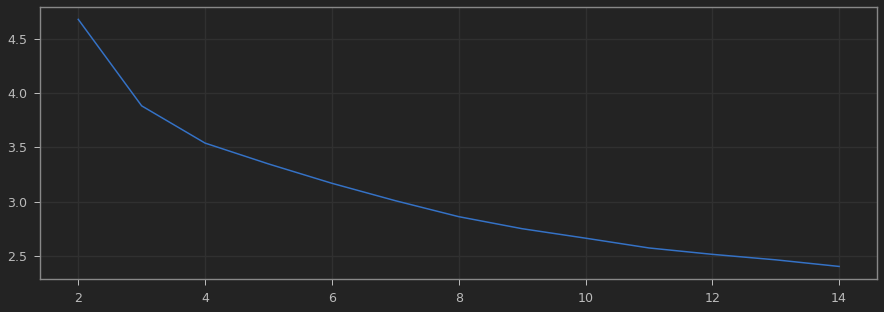

In [21]:
plt.figure(figsize=(15,5))
plt.plot(n_cluster,distortions)
plt.grid()